<a href="https://colab.research.google.com/github/dhyougit/NLP/blob/main/Classfy_N_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

'2.14.0'

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
# check data
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
# reverse the index
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

# Prepare dataset

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [12]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [14]:
#from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Build Model

In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [16]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Verify model

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 1s 55ms/step - loss: 2.7724 - accuracy: 0.5051 - val_loss: 1.8725 - val_accuracy: 0.6090
Epoch 2/20
16/16 [==============================] - 1s 54ms/step - loss: 1.5750 - accuracy: 0.6716 - val_loss: 1.4136 - val_accuracy: 0.6870
Epoch 3/20
16/16 [==============================] - 1s 39ms/step - loss: 1.2091 - accuracy: 0.7377 - val_loss: 1.2308 - val_accuracy: 0.7310
Epoch 4/20
16/16 [==============================] - 0s 27ms/step - loss: 0.9868 - accuracy: 0.7909 - val_loss: 1.1543 - val_accuracy: 0.7360
Epoch 5/20
16/16 [==============================] - 0s 28ms/step - loss: 0.8245 - accuracy: 0.8224 - val_loss: 1.0316 - val_accuracy: 0.7750
Epoch 6/20
16/16 [==============================] - 0s 27ms/step - loss: 0.6806 - accuracy: 0.8535 - val_loss: 0.9816 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 29ms/step - loss: 0.5740 - accuracy: 0.8786 - val_loss: 0.9492 - val_accuracy: 0.7980
Epoch 8/20
16

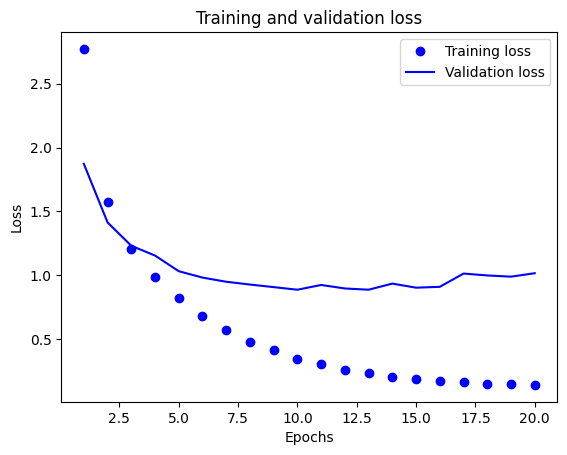

In [19]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
history.history

{'loss': [2.772397994995117,
  1.5749733448028564,
  1.209088921546936,
  0.9868441820144653,
  0.8244776129722595,
  0.6805922985076904,
  0.5739840269088745,
  0.4780508279800415,
  0.41198161244392395,
  0.3472736179828644,
  0.30336427688598633,
  0.2612607777118683,
  0.23546579480171204,
  0.20576000213623047,
  0.19048945605754852,
  0.17413079738616943,
  0.16625724732875824,
  0.15136265754699707,
  0.14618052542209625,
  0.1411428451538086],
 'accuracy': [0.5051365494728088,
  0.671636164188385,
  0.737659752368927,
  0.7909045219421387,
  0.822350263595581,
  0.8535454869270325,
  0.8786018490791321,
  0.8987722396850586,
  0.911926805973053,
  0.924079179763794,
  0.9333500266075134,
  0.9412428140640259,
  0.9439989924430847,
  0.9501377940177917,
  0.9530193209648132,
  0.9521422982215881,
  0.9548985362052917,
  0.9536457061767578,
  0.9552743434906006,
  0.957028329372406],
 'val_loss': [1.872531771659851,
  1.4136401414871216,
  1.2308290004730225,
  1.1542524099349976

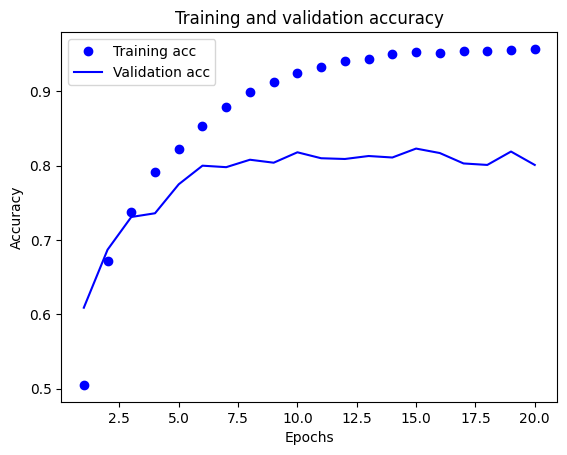

In [22]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Overfitting. Re-fit the model

In [23]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 38ms/step - loss: 2.6330 - accuracy: 0.5195 - val_loss: 1.7207 - val_accuracy: 0.6380
Epoch 2/9
16/16 [==============================] - 0s 28ms/step - loss: 1.4528 - accuracy: 0.6933 - val_loss: 1.3055 - val_accuracy: 0.7030
Epoch 3/9
16/16 [==============================] - 0s 29ms/step - loss: 1.1119 - accuracy: 0.7603 - val_loss: 1.1454 - val_accuracy: 0.7540
Epoch 4/9
16/16 [==============================] - 0s 28ms/step - loss: 0.9056 - accuracy: 0.8013 - val_loss: 1.0457 - val_accuracy: 0.7720
Epoch 5/9
16/16 [==============================] - 0s 28ms/step - loss: 0.7485 - accuracy: 0.8376 - val_loss: 0.9889 - val_accuracy: 0.7880
Epoch 6/9
16/16 [==============================] - 0s 27ms/step - loss: 0.6214 - accuracy: 0.8681 - val_loss: 0.9571 - val_accuracy: 0.7880
Epoch 7/9
16/16 [==============================] - 0s 28ms/step - loss: 0.5138 - accuracy: 0.8904 - val_loss: 0.9178 - val_accuracy: 0.8020
Epoch 8/9
16/16 [===

In [24]:
results

[0.9838737845420837, 0.7756010890007019]

In [25]:
# in case of random shuffle.. accuracy is around :
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)


0.1892252894033838

# For unseen data

In [26]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [27]:
predictions[0].shape

(46,)

In [28]:
np.sum(predictions[0])

0.99999994

In [29]:
# for example,, highest value amoung the 46 stalls become the accuracy prediction label
np.argmax(predictions[0])

3

# Another way to encode label

In [30]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [31]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [32]:
# for this type of int tensor, you need to change the loss function

# another validation showing importance of thick middle layer

In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 16ms/step - loss: 2.8735 - accuracy: 0.3399 - val_loss: 1.9917 - val_accuracy: 0.5940
Epoch 2/20
63/63 [==============================] - 1s 12ms/step - loss: 1.6534 - accuracy: 0.6254 - val_loss: 1.5020 - val_accuracy: 0.6350
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.3418 - accuracy: 0.6622 - val_loss: 1.3811 - val_accuracy: 0.6470
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.1936 - accuracy: 0.6865 - val_loss: 1.3312 - val_accuracy: 0.6530
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 1.0851 - accuracy: 0.7005 - val_loss: 1.2744 - val_accuracy: 0.6610
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 0.9940 - accuracy: 0.7171 - val_loss: 1.2456 - val_accuracy: 0.6810
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 0.9104 - accuracy: 0.7524 - val_loss: 1.2400 - val_accuracy: 0.6970
Epoch 8/20
63/63 

In [36]:
results_small = model.evaluate(x_test, one_hot_test_labels)
results_small

71/71 [==============================] - 0s 3ms/step - loss: 1.6924 - accuracy: 0.7115


[1.69236159324646, 0.7114871144294739]